## 1. Overview of the dataframe

In [45]:
import pandas
from datetime import datetime
from pytz import utc
data = pandas.read_csv("reviews.csv", parse_dates=["Timestamp"])

In [7]:
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [8]:
data.shape

(45000, 4)

In [12]:
data.columns

Index(['Course Name', 'Timestamp', 'Rating', 'Comment'], dtype='object')

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

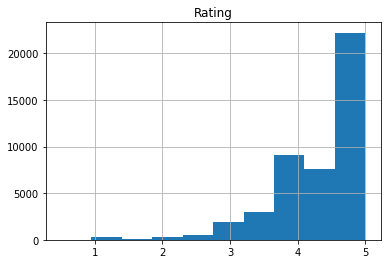

In [13]:
data.hist("Rating")

## 2. Selecting data from dataframe

### selecting a column and multiple colunms

In [14]:
type(data["Rating"])

pandas.core.series.Series

In [17]:
type(data[["Rating"],"Comment"])

pandas.core.frame.DataFrame

### Selecting a row and multiple rows

In [19]:
type(data.iloc[3])

pandas.core.series.Series

In [21]:
type(data.iloc[1:5])

pandas.core.frame.DataFrame

### Select a section 

In [27]:
data[["Rating","Comment"]].iloc[1:3]

,Rating,Comment
1,4.0,NaN
2,4.0,NaN


### Select a cell

In [28]:
data["Rating"].iloc[6]

4.5

In [29]:
data.at[2,"Rating"]

4.0

## 3. Filtering data based on conditions

### One condition

In [35]:
d2=data[data["Rating"]>4]
d2["Rating"].mean()

4.87316015861281

### Multiple conditions

In [37]:
data[(data["Rating"]>4 )&(data['Comment'])]

,Course Name,Timestamp,Rating,Comment
11,The Python Mega Course: Build 10 Real World Ap...,2021-04-01 15:25:18+00:00,5.0,No
19,100 Python Exercises I: Evaluate and Improve Y...,2021-04-01 08:47:42+00:00,4.5,Excellent set of practical problems. Thank you!
22,The Python Mega Course: Build 10 Real World Ap...,2021-04-01 05:47:51+00:00,5.0,Great course.
60,Python for Beginners with Examples,2021-03-31 07:21:59+00:00,5.0,really enjoying it so far
87,The Python Mega Course: Build 10 Real World Ap...,2021-03-30 07:43:37+00:00,4.5,Well explained . Straight to the point !
...,...,...,...,...
44947,Python for Beginners with Examples,2018-01-02 03:54:17+00:00,4.5,This course is amazing ! it teaches me very us...
44951,The Python Mega Course: Build 10 Real World Ap...,2018-01-02 02:05:52+00:00,4.5,"Clear, concise and compact modules so far."
44954,Data Processing with Python,2018-01-01 23:36:07+00:00,4.5,might have had a mac installation tutorial also
44957,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 21:35:13+00:00,5.0,i like how thorough it is


## 4.Time-based Filter

In [49]:
data[(data["Timestamp"] >= datetime(2020,1,1, tzinfo = utc)) & (data["Timestamp"] <= datetime(2021,1,1, tzinfo=utc))]

,Course Name,Timestamp,Rating,Comment
3041,The Python Mega Course: Build 10 Real World Ap...,2020-12-31 23:42:21+00:00,5.0,NaN
3042,The Python Mega Course: Build 10 Real World Ap...,2020-12-31 23:25:08+00:00,4.0,NaN
3043,The Python Mega Course: Build 10 Real World Ap...,2020-12-31 20:44:52+00:00,4.0,NaN
3044,Data Processing with Python,2020-12-31 18:55:33+00:00,4.0,NaN
3045,The Python Mega Course: Build 10 Real World Ap...,2020-12-31 17:41:27+00:00,4.0,NaN
...,...,...,...,...
19621,The Python Mega Course: Build 10 Real World Ap...,2020-01-01 08:15:48+00:00,5.0,NaN
19622,The Python Mega Course: Build 10 Real World Ap...,2020-01-01 06:24:54+00:00,5.0,Clearly stated and simple
19623,Python for Beginners with Examples,2020-01-01 02:15:47+00:00,5.0,NaN
19624,The Python Mega Course: Build 10 Real World Ap...,2020-01-01 01:10:35+00:00,4.5,NaN


## 5. From data to infomation(Practice)

### Average of uncomment rating 

In [55]:
data[data["Comment"].isnull()]["Rating"].mean()

4.433679746603492

### Average of comment rating 

In [56]:
data[data["Comment"].notnull()]["Rating"].mean()

4.489777908515959

### Number of comments containing Accent

In [57]:
data[data["Comment"].str.contains("accent",na=False)]["Rating"].count()

77

### Average of comments rating containing Accent

In [58]:
data[data["Comment"].str.contains("accent",na=False)]["Rating"].mean()

3.8636363636363638